# mtcars

In this notebook, you'll explore the iconic `mtcars` dataset. Why mtcars? Because it is a classic pedagogical dataset and there is A LOT written about it online. Every complicated concept we encounter, you should be able to google the name plus `mtcars` and find some information about it. So for example, when we study linear regression, you'll be able to google "linear regression mtcars" and find a million billion tutorials that use this dataset to teach regressions. It will give us a common vocabulary with other learners around the world. 

### Standard Python and R imports

In [9]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [11]:
%%R

# My commonly used R imports

require('tidyverse')

In [12]:
# EXAMPLE PYTHON CELL

df = pd.DataFrame(
    np.random.randint(0,100,size=(100, 2)), columns=list('AB'))
df.head()

,A,B
0,11,86
1,57,50
2,77,93
3,31,97
4,81,76


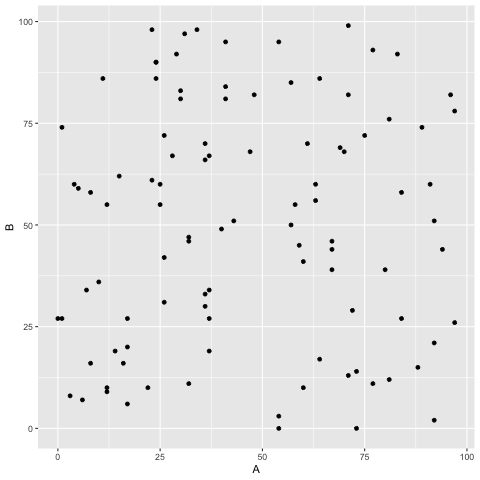

In [13]:
%%R -i df

# EXAMPLE R CELL
df
plt <- ggplot(df) +
    geom_point(aes(A,B))

plt

## Load the data

In [14]:
%%R
 
# Import data with R
mtcars <- read_csv('mtcars.csv', show_col_types = FALSE)
mtcars %>% head(4)

# A tibble: 4 × 12
  name           mpg   cyl  disp    hp  drat    wt  qsec    vs    am  gear  carb
  <chr>        <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 Mazda RX4     21       6   160   110  3.9   2.62  16.5     0     1     4     4
2 Mazda RX4 W…  21       6   160   110  3.9   2.88  17.0     0     1     4     4
3 Datsun 710    22.8     4   108    93  3.85  2.32  18.6     1     1     4     1
4 Hornet 4 Dr…  21.4     6   258   110  3.08  3.22  19.4     1     0     3     1


In [15]:
# Import data in python
mtcars = pd.read_csv('mtcars.csv')
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Exploratory data analysis

So far we've done a lot of looking at distributions of single variables. In this dataset we have some continuous variables (like `mpg`, `disp`, `hp`, `drat`, `wt`, and `qsec`) and some discrete variables (like `vs`, `am`, `gear`, and `carb`). Let's quickly glance through the distributions of them.




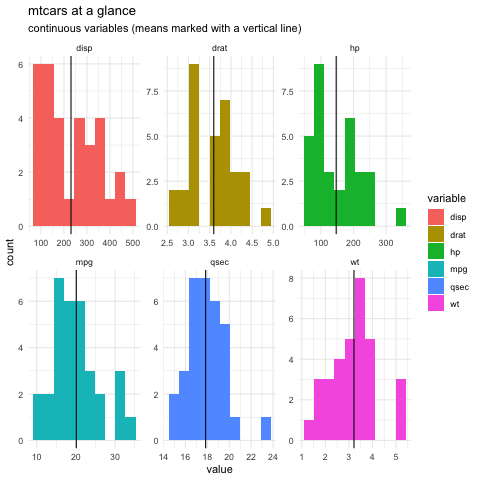

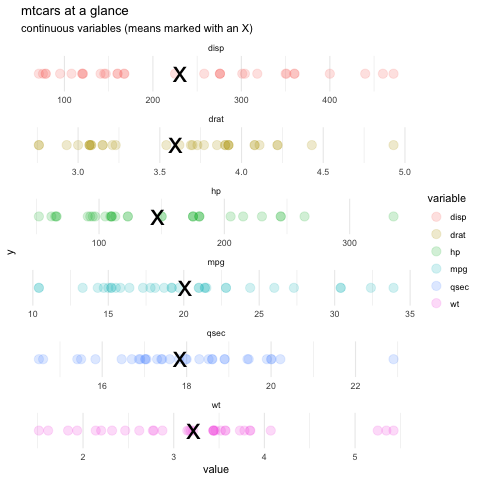

In [20]:
%%R 

continuous_variables <- c('mpg', 'disp', 'hp', 'drat', 'wt', 'qsec')
discrete_variables   <- c('vs', 'am', 'gear', 'carb')

# Conevert to long format
mtcars_long = mtcars %>% pivot_longer(!name, names_to = 'variable', values_to = 'value') 

# plot only continuous variables
to_plot <- mtcars_long %>% filter(variable %in% continuous_variables)

histogram_means <- to_plot %>%
  group_by(variable) %>%
  summarise(mean = mean(value))

plot_continuous_histograms <- ggplot(to_plot) +
    aes(x=value, fill=variable, group=variable) +
    geom_histogram(bins=10) +
    geom_vline(data=histogram_means, aes(xintercept=mean)) +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='continuous variables (means marked with a vertical line)')


plot_continuous_dotplot <- ggplot(to_plot) +
    aes(x=value, y=1, color=variable) +
    geom_point(size=4, alpha=.2) +
    stat_summary(fun.y= mean, geom="point", shape='x',
                 size=10, color="black", alpha=1, orientation='y') +
    facet_wrap(~variable, scales='free', ncol=1) +
    theme_minimal() +
    labs(
        title = 'mtcars at a glance', 
        subtitle='continuous variables (means marked with an X)'
    ) +
    theme(
            axis.text.y=element_blank(),  #remove y axis labels
            axis.ticks.y=element_blank(),  #remove y axis ticks
            panel.grid.major.y = element_blank(), #remove y axis grid
            panel.grid.minor.y = element_blank(), #remove y axis grid
    )



# display both plots
print(plot_continuous_histograms)
print(plot_continuous_dotplot)

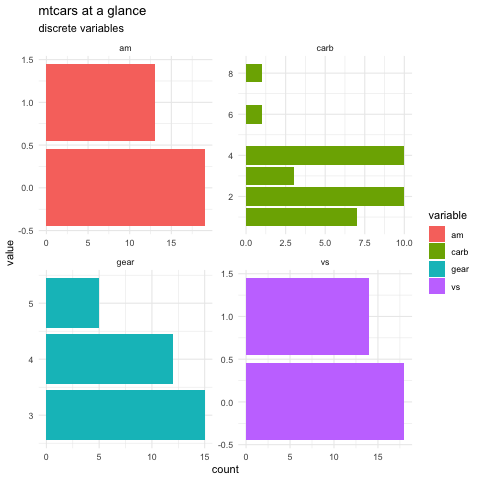

In [76]:
%%R 

# plot only discrete variables
to_plot <- mtcars_long %>% filter(variable %in% discrete_variables)

plot_discrete <- ggplot(to_plot) +
    aes(y=value, fill=variable) +
    geom_bar() +
    facet_wrap(~variable, scales='free') +
    theme_minimal() +
    labs(title = 'mtcars at a glance', subtitle='discrete variables')


plot_discrete

👉 What can we conclude about this dataset from the charts above?

In [7]:
%%R
#I am still not familiar with the dataset, so i'll check out the summary statistics
summary(mtcars)



      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

From what I can see, there seems to be a pretty broad distribution of cars. And it also requires a pretty close look to undestand what is going on. For example, AM is a binary configuration. A car can only ever be manual or automatic (at least in the context of this data), so looking at the mean is quite useless. 

👉 What can we not conclude about this dataset from the charts above?

It is had to say anything with a bunch of summary statistics. I can only look at each set in isolation. I cannot draw conclusions when I look at them separately.

👉 What further questions about this data do you have now? 

Since there are discrete and continous variables, it would be interesting to see the relationship between all of them.

# Comparing variables to one another

You're welcome to explore those univariate distributions more, but let's focus on something new. Comparing variables to one another. I'll start you off with a basic scatter plot.


`geom_smooth()` using formula = 'y ~ x'


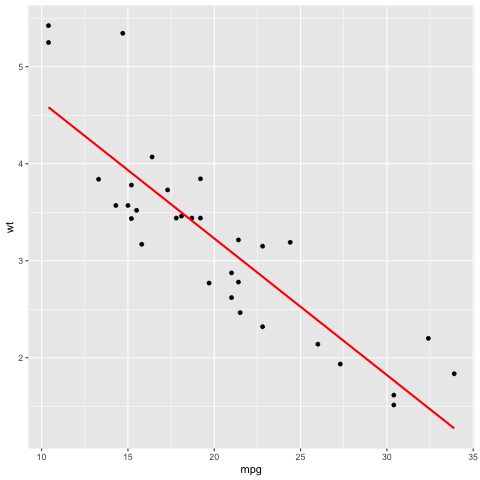

In [23]:
%%R

ggplot(mtcars) +
    aes(x=mpg, y=wt) +
    geom_point() +
    geom_smooth(colour='red', method='lm', se=FALSE)

In [57]:
%%R
require("ggrepel")

In [63]:
%%R
library(ggrepel)

# 👉 Try It

1. Imporve the chart above. Add a title and subtitle, and better axis labels. Be **very careful** about the language you use in the headline. Assume you have a very strict copyeditor, make the language easy to understand but make sure you're not saying more than what the data proves.

`geom_smooth()` using formula = 'y ~ x'


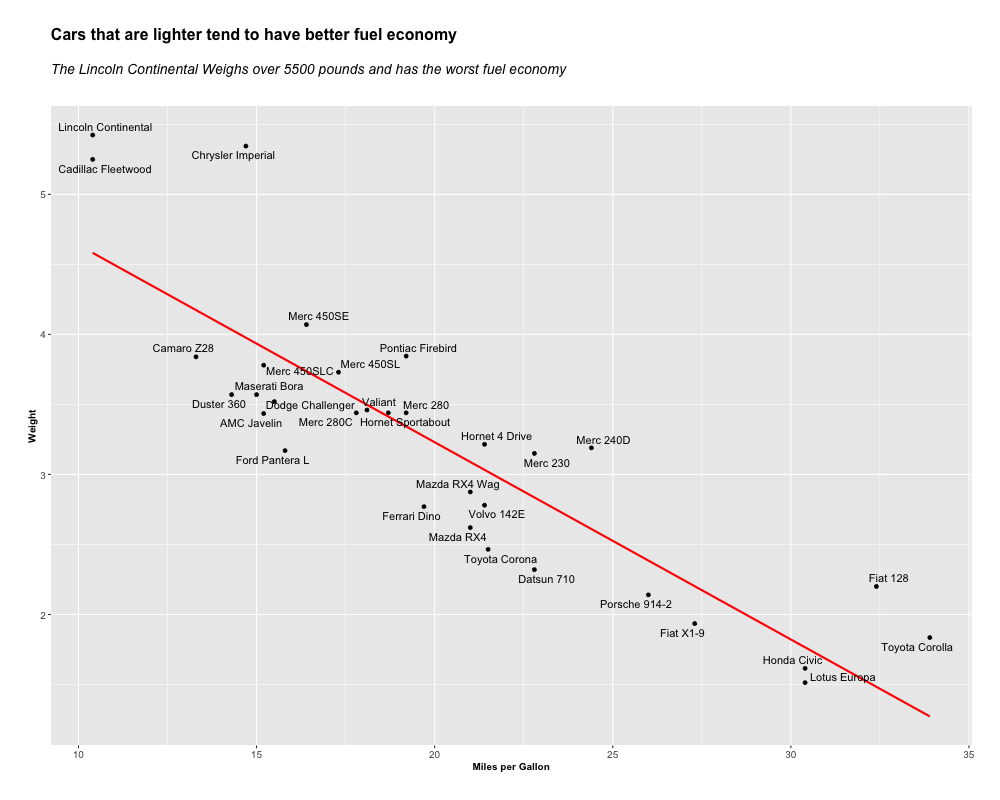

In [74]:
%%R -w 1000 -h 800


ggplot(mtcars, aes(x = mpg, y = wt)) +
  geom_point() +
  geom_smooth(colour = "red", method = "lm", se = FALSE) +
  geom_text_repel(aes(label = name)) +
  labs(x = "Miles per Gallon", y = "Weight",
       title = "Cars that are lighter tend to have better fuel economy",
       subtitle = "The Lincoln Continental Weighs over 5500 pounds and has the worst fuel economy") +
  theme(plot.title = element_text(size = 16, face = "bold", margin = margin(b = 20)),
        plot.subtitle = element_text(size = 14, face = "italic", margin = margin(b = 30)),
        axis.title = element_text(size = 12, face = "bold"),
        axis.text = element_text(size = 12),
        plot.margin = unit(c(1,1,1,1), "cm"))

2. Answer the questions below:

    a. What can we conclude about fuel efficiency and weight

    There's a direct correlation between fuel efficiency and weight. It also makes sense because the lightest cars have historically had more fuel efficiency, manufacturers always cut down on weight to make their cars consume less fuel and the graph reflects that. 

    b. What can't we conclude about fuel efficiency and weight

    What we cannot conclude is that if it's merely weight that allows cars to be more fuel efficient. Other factors will have to be taken into account. 

    c. What further questions do you have about this data?
    
    What different things contribute to things like quarter mile time, and horsepower.

## Part 1 (Gudied Inquiry)
# 👉 What makes cars more fuel efficient?


`geom_smooth()` using formula = 'y ~ x'


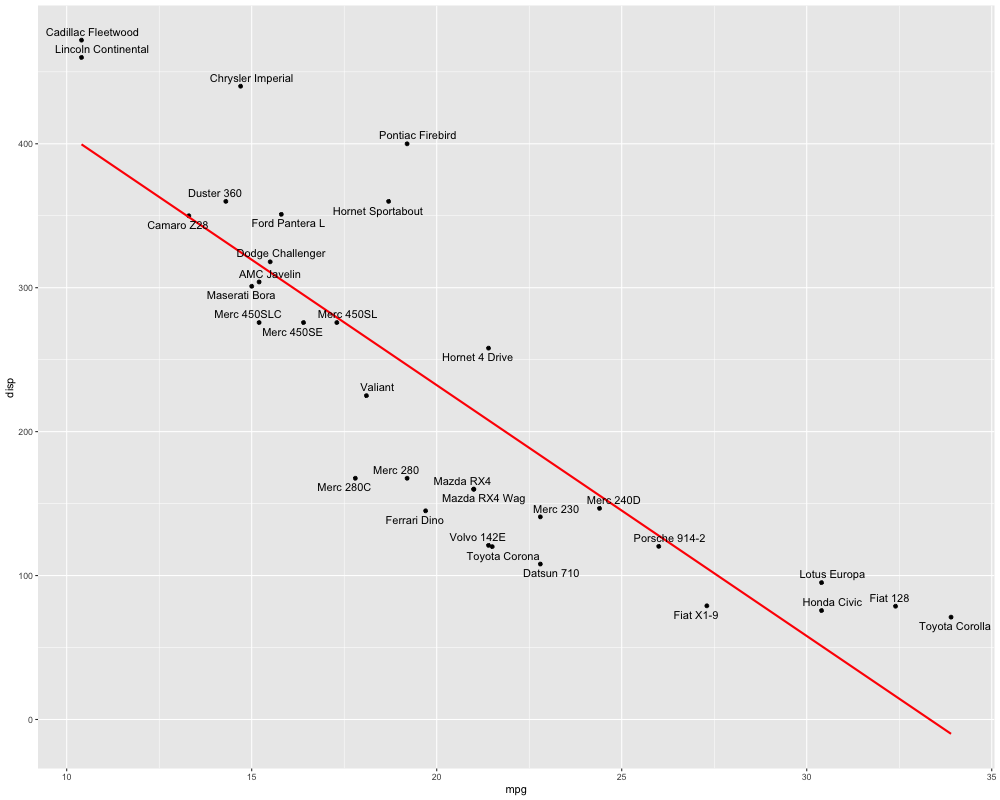

In [85]:
%%R -w 1000 -h 800
#Let's check out engine displacement and that relationship with fuel economy
ggplot(mtcars, aes(x = mpg, y = disp)) +
  geom_point() +
  geom_smooth(colour = "red", method = "lm", se = FALSE) +
  geom_text_repel(aes(label = name))
  #Hmm, there's a case to be made for the correlation  between engine displacement and fuel economy. 
  # Take the corolla and the Cadillac for example, they are heaver and the Cadillac needs bigger engines to move around

In [ ]:
%%R


`geom_smooth()` using formula = 'y ~ x'


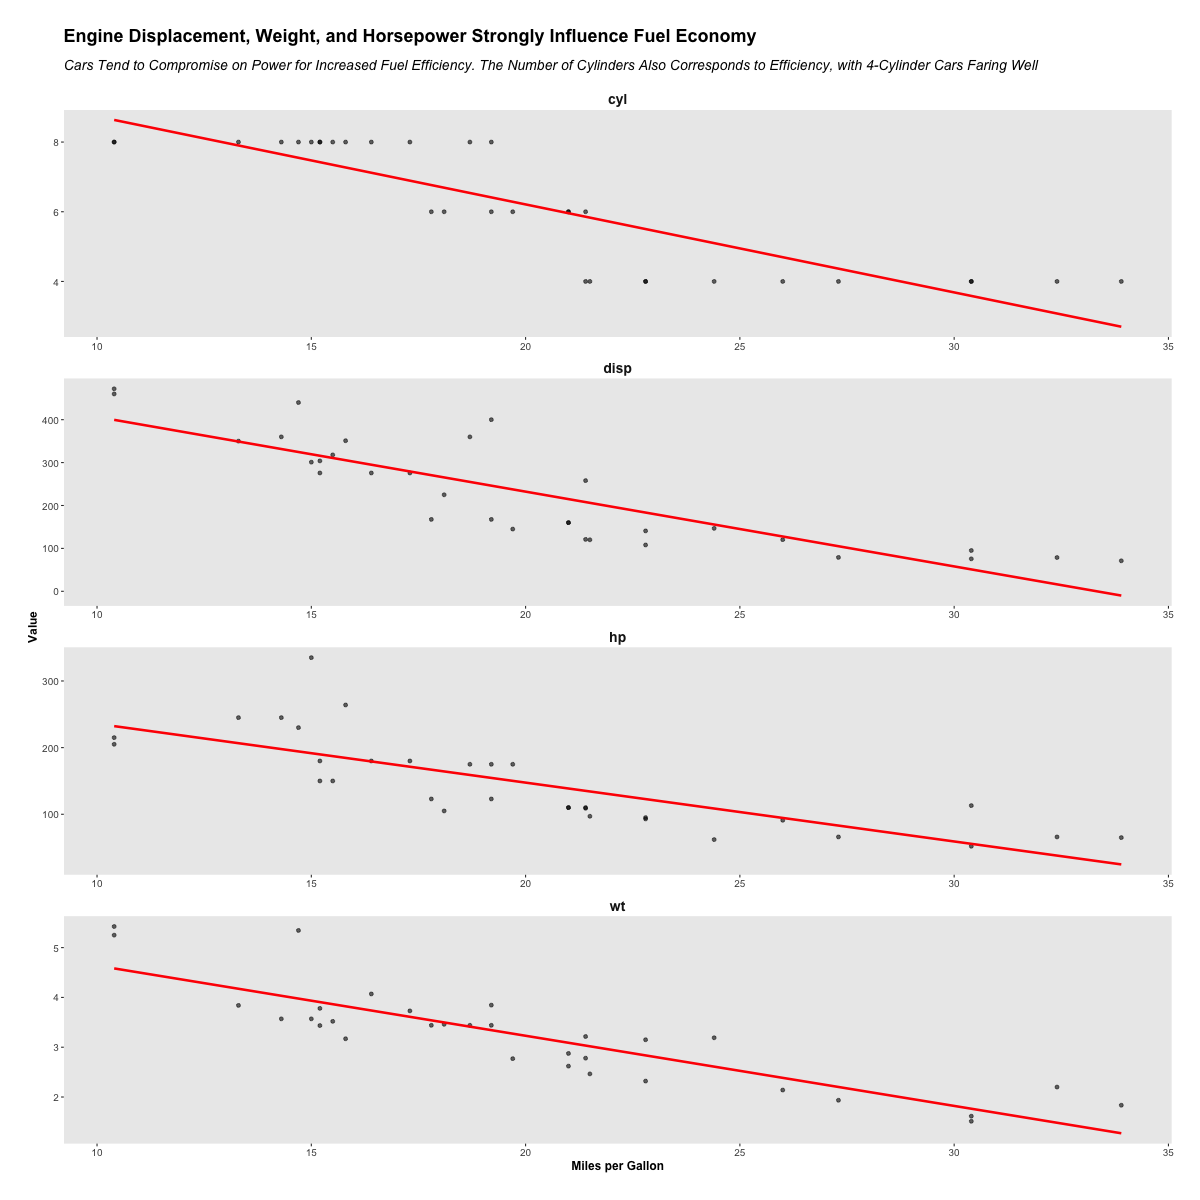

In [96]:
%%R -w 1200 -h 1200
#I want to stop wasting time and will make a facet wrap, thanks to Aisvarya, who told me how to do it.
mtcars_long = mtcars %>% pivot_longer(!c(name,mpg), names_to = 'variable', values_to = 'value')
#Over here I just want to facet wrap these variables
for_fact <- c('disp', 'cyl', 'hp', 'wt')
#Now we make the plot list
to_plot <- mtcars_long %>% filter(variable %in% for_fact)
#Now we make the plot
ggplot(to_plot, aes(x = mpg, y = value)) +
  geom_point(alpha = 0.6) +
  geom_smooth(colour = "red", method = "lm", se = FALSE, size = 1.2) +
  facet_wrap(~variable, scales='free', ncol=1) +
  labs(title = 'Engine Displacement, Weight, and Horsepower Strongly Influence Fuel Economy',
       subtitle = 'Cars Tend to Compromise on Power for Increased Fuel Efficiency. The Number of Cylinders Also Corresponds to Efficiency, with 4-Cylinder Cars Faring Well',
       x = "Miles per Gallon", y = "Value") +
  theme(plot.title = element_text(size = 18, face = "bold", margin = margin(b = 15)),
        plot.subtitle = element_text(size = 14, face = "italic", margin = margin(b = 15)),
        axis.title = element_text(size = 12, face = "bold"),
        axis.text = element_text(size = 10),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.text = element_text(size = 14, face = "bold"),
        strip.background = element_rect(fill = "white"),
        plot.margin = unit(c(1,1,1,1), "cm"))

# 👉 Question 1: What makes a car fast?

(replace the text in this cell with your question)

### 👉 Charts or summary statistics to help answer your question

In [ ]:
%%R 

# ggplot code here

### 👉 Reflection

a. What can we conclude?

b. What can't we conclude?

c. What further questions does this analysis raise?
